In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import allantools

In [2]:
# Loading data file
# Column 1: B_x
# Column 2: B_y
# Column 3: B_z
# Column 4: |B|
# Column 5: time
# Column 6: Δt between measurements
magX = np.loadtxt('mag_data.txt', usecols=0)
magY = np.loadtxt('mag_data.txt', usecols=1)
magZ = np.loadtxt('mag_data.txt', usecols=2)
magn = np.loadtxt('mag_data.txt', usecols=3)
time = np.loadtxt('mag_data.txt', usecols=4)
# Define the sampling period as the mean Δt between measurements
tau_0 = np.mean(np.loadtxt('mag_data.txt', usecols=5))

# Compute overlapping Allan variance for B_x, B_y, B_z, and |B|
(tauX, adevX, adev_errorX, nX) = allantools.oadev(magX, rate=1/tau_0, taus='all')
(tauY, adevY, adev_errorY, nY) = allantools.oadev(magY, rate=1/tau_0, taus='all')
(tauZ, adevZ, adev_errorZ, nZ) = allantools.oadev(magZ, rate=1/tau_0, taus='all')
(tau, adev, adev_error, n) = allantools.oadev(magn, rate=1/tau_0, taus='all')

# Compute standard deviation of the measurements
stdX = np.std(magX)
stdY = np.std(magY)
stdZ = np.std(magZ)
std = np.std(magn)

# Compute spectral density
(fX, psdX) = sp.signal.periodogram(magX, fs=1/tau_0)
(fY, psdY) = sp.signal.periodogram(magY, fs=1/tau_0)
(fZ, psdZ) = sp.signal.periodogram(magZ, fs=1/tau_0)
(f, psd) = sp.signal.periodogram(magn, fs=1/tau_0)

# B_x

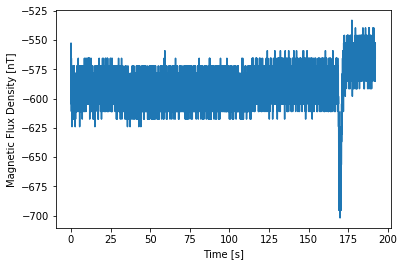

Standard deviation of measurements: 15.702389550515347 nT.


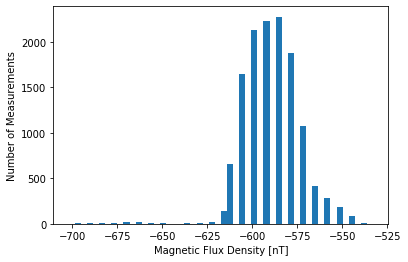

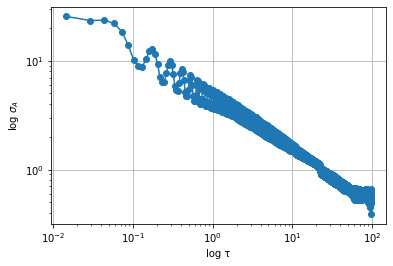

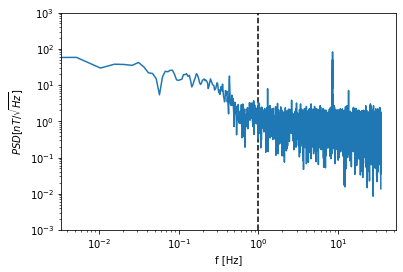

Noise floor at 1 Hz: 3.363463593246411 nT * Hz^(-1/2).


In [3]:
# B_x vs time
plt.figure(1)
plt.plot(time, magX)
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

print('Standard deviation of measurements: ' + str(stdX) + ' nT.')

# histogram
plt.figure(2)
plt.hist(magX, 50)
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of Allan deviation vs averaging time
plt.figure(3)
plt.loglog(tauX, np.sqrt(adevX), '-o')
plt.grid()
plt.xlabel('log τ')
plt.ylabel(r'log $ \sigma_A $')
plt.show()

# log-log plot of power spectral desity vs frequency
plt.figure(4)
plt.loglog(fX, np.sqrt(psdX))
plt.vlines(1, 10**-3, 10**3, linestyles='dashed')
plt.ylim(10**-3,10**3)
plt.xlabel('f [Hz]')
plt.ylabel(r'$PSD [nT/\sqrt{Hz}]$')
plt.show()

print('Noise floor at 1 Hz: ' + str(np.sqrt(psdX[np.searchsorted(fX, 1., side="left")])) + ' nT * Hz^(-1/2).')

# B_y

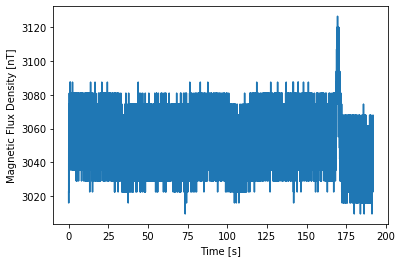

Standard deviation of measurements: 15.375687456777118 nT.


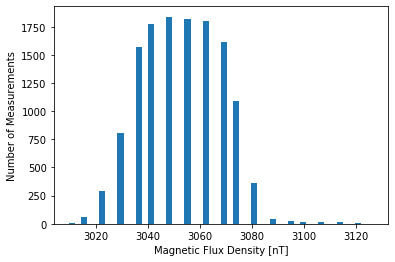

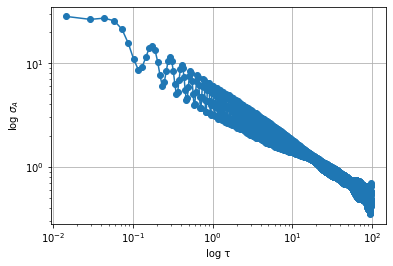

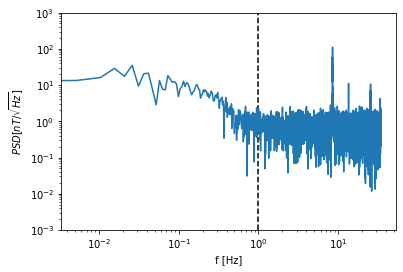

Noise floor at 1 Hz: 2.2761249116327513 nT * Hz^(-1/2).


In [4]:
# B_y vs time
plt.figure(5)
plt.plot(time, magY)
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

print('Standard deviation of measurements: ' + str(stdY) + ' nT.')

# histogram
plt.figure(6)
plt.hist(magY, 50)
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of Allan deviation vs averaging time
plt.figure(7)
plt.loglog(tauY, np.sqrt(adevY), '-o')
plt.grid()
plt.xlabel('log τ')
plt.ylabel(r'log $ \sigma_A $')
plt.show()

# log-log plot of power spectral desity vs frequency
plt.figure(8)
plt.loglog(fY, np.sqrt(psdY))
plt.vlines(1, 10**-3, 10**3, linestyles='dashed')
plt.ylim(10**-3,10**3)
plt.xlabel('f [Hz]')
plt.ylabel(r'$PSD [nT/\sqrt{Hz}]$')
plt.show()

print('Noise floor at 1 Hz: ' + str(np.sqrt(psdY[np.searchsorted(fY, 1., side="left")])) + ' nT * Hz^(-1/2).')

# B_z

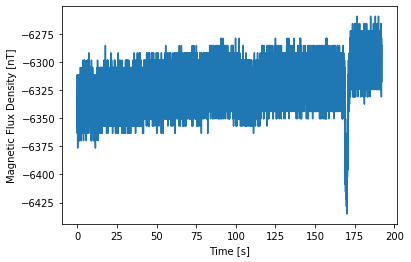

Standard deviation of measurements: 20.19535575178103 nT.


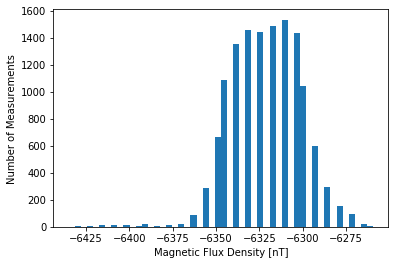

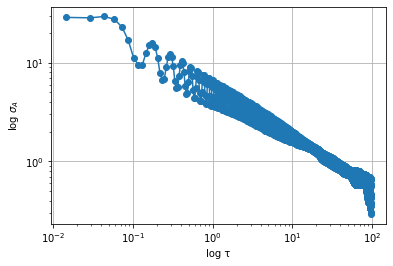

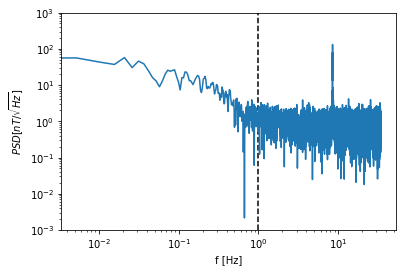

Noise floor at 1 Hz: 1.0732126461702542 nT * Hz^(-1/2).


In [5]:
# B_z vs time
plt.figure(9)
plt.plot(time, magZ)
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

print('Standard deviation of measurements: ' + str(stdZ) + ' nT.')

# histogram
plt.figure(10)
plt.hist(magZ, 50)
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of Allan deviation vs averaging time
plt.figure(11)
plt.loglog(tauZ, np.sqrt(adevZ), '-o')
plt.grid()
plt.xlabel('log τ')
plt.ylabel(r'log $ \sigma_A $')
plt.show()

# log-log plot of power spectral desity vs frequency
plt.figure(12)
plt.loglog(fZ, np.sqrt(psdZ))
plt.vlines(1, 10**-3, 10**3, linestyles='dashed')
plt.ylim(10**-3,10**3)
plt.xlabel('f [Hz]')
plt.ylabel(r'$PSD [nT/\sqrt{Hz}]$')
plt.show()

print('Noise floor at 1 Hz: ' + str(np.sqrt(psdZ[np.searchsorted(fZ, 1., side="left")])) + ' nT * Hz^(-1/2).')

# |B|

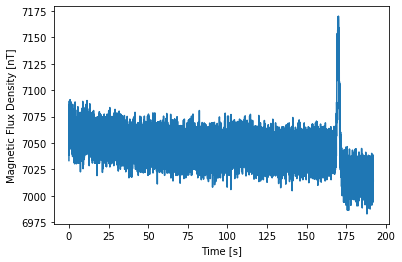

Standard deviation of measurements: 18.005476342402027 nT.


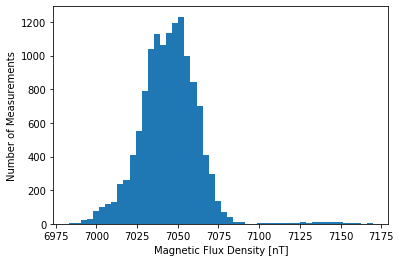

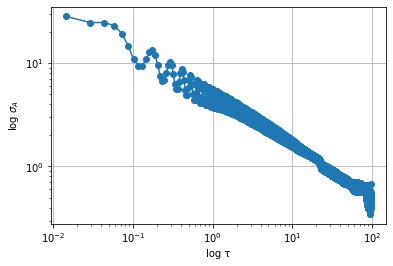

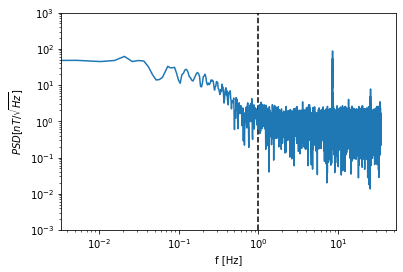

Noise floor at 1 Hz: 0.8756700014039062 nT * Hz^(-1/2).


In [6]:
# |B| vs time
plt.figure(13)
plt.plot(time, magn)
plt.xlabel('Time [s]')
plt.ylabel('Magnetic Flux Density [nT]')
plt.show()

print('Standard deviation of measurements: ' + str(std) + ' nT.')

# histogram
plt.figure(14)
plt.hist(magn, 50)
plt.xlabel('Magnetic Flux Density [nT]')
plt.ylabel('Number of Measurements')
plt.show()

# log-log plot of Allan deviation vs averaging time
plt.figure(15)
plt.loglog(tau, np.sqrt(adev), '-o')
plt.grid()
plt.xlabel('log τ')
plt.ylabel(r'log $ \sigma_A $')
plt.show()

# log-log plot of power spectral desity vs frequency
plt.figure(16)
plt.loglog(f, np.sqrt(psd))
plt.vlines(1, 10**-3, 10**3, linestyles='dashed')
plt.ylim(10**-3,10**3)
plt.xlabel('f [Hz]')
plt.ylabel(r'$PSD [nT/\sqrt{Hz}]$')
plt.show()

print('Noise floor at 1 Hz: ' + str(np.sqrt(psd[np.searchsorted(f, 1., side="left")])) + ' nT * Hz^(-1/2).')